Machine learning requires

- input data e.g. images  
- output expectation e.g. image tags  
- a measure of the difference between output and expectation  

Machine learning requires input data (cat and dog images), output expectations (the labels 'cat' and 'dog') and a measure of how different the output is from the expectation (the prediction is 36% wrong).

The adjustment step is called **learning**

Data is progressively transformed into a series of intermediate representations

A **statistical model** learns a combined transformation from input data into a meaningful output

Parameters are tweaked in a series of steps and the machine's predictions (hopefully) improve. The program - or statistical model, or specifically, the neural network - makes predictions by processing data through a series of intermediate representations - from pixel maps to labels 'dog' or 'cat'.

E.g. data points (x, y) are 'red' or 'black'

Seek a transformation $(x, y) \to \{\text{black}, \text{red}\}$

For example, suppose data is of the form (x, y) - a two element vector. Each data point is labeled 'black' or 'red'. We wish to identify which data points are red and which are black.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 100
x = -1 + 2 * np.random.random(num_points)
L = np.sqrt(1 - x * x)
y = L * (-1 + 2 * np.random.random(num_points))

def f(x):
    return -2 * x

x_black = x[y > f(x)]
y_black = y[y > f(x)]

x_red = x[y <= f(x)]
y_red = y[y <= f(x)]

In [2]:
def plot_data():
    
    plt.axes().set_aspect('equal')
    plt.plot(x_black, y_black, 'ko')
    plt.plot(x_red, y_red, 'ro')

    u = np.linspace(-1, 1, 100)
    v = np.zeros(100)
    
    plt.plot(u, v, 'b')
    plt.plot(v, u, 'b')
    plt.show()

In [3]:
def print_data():
    for i in range(len(x)):
        label = 'black' if y[i] > f(x[i]) else 'red'
        print(f'{x[i]: 12.10f}', ', ', f'{y[i]: 12.10f}', '\t', label,  sep='')

In [4]:
print_data()

-0.7196194015,  0.0768843182	red
-0.7733622903,  0.4822502158	red
-0.1687069560,  0.1940698981	red
-0.7593503947,  0.6132877874	red
-0.3728508990,  0.6032301272	red
 0.9511936903,  0.2137315401	black
-0.3461635841,  0.2671155599	red
-0.4534801280, -0.5658154768	red
-0.7692616772,  0.6065827073	red
-0.9376677300,  0.0894997839	red
 0.5890293787, -0.2404057772	black
 0.0493696812,  0.4034707323	black
 0.0123642054, -0.2467772787	red
 0.1427722121, -0.0403073333	black
-0.3084044337, -0.2586423558	red
-0.1882522786, -0.1980493333	red
-0.8849681227,  0.1711109518	red
-0.0509441630,  0.9391880072	black
 0.9490004293, -0.1528670598	black
-0.3064188652,  0.4595253704	red
 0.8154186041,  0.5708986167	black
-0.5582569962,  0.4169337742	red
-0.8997255715, -0.3370019726	red
-0.0676870379,  0.0434726440	red
-0.8698930172,  0.1480605883	red
-0.9778067408,  0.0234544163	red
-0.5664430465, -0.3832901425	red
 0.2475992245, -0.9499718576	red
 0.4007984488,  0.3589747859	black
-0.7251442642, -0.036575099

Here is the data set, as the machine 'sees' it. Is there a simple association between (x, y) and red/black?  

The machine seeks a transformation

\begin{align*}
x' &= w_{11} x + w_{12} y \\
y' &= w_{21} x + w_{22} y
\end{align*}

such that

\begin{align*}
x' > 0 &\implies \text{ 'black'} \\
x' \le 0 &\implies \text{ 'red'}
\end{align*}

w11, w12, w21, and w22 are adjustable parameters. They specify a particular linear transformation.  The task is to find values of these six parameters that will ensure black vectors are mapped to vectors with a positive x; red vectors are taken to vectors with a zero or negative x value.

The machine starts with random parameter values

The parameters are tweaked

Trials are informed by error

Parameter values are initially random.  w11, w12, w21, and w22 are tweaked until all the points are correctly separated (or until there is no further improvement). The error in the prediction informs the subsequent trial.

After much hunting, the machine discovers that

\begin{align*}
w_{11} &= 0.8944271909999159 \\
w_{12} &= 0.447213595499958 \\
w_{21} &= -0.447213595499958 \\
w_{22} &= 0.8944271909999159
\end{align*}

enable a correct prediction $x' > 0 \implies \text{ 'black'}$, otherwise 'red'

After much hunting the machine discovers that these values... enable a correct prediction x' > 0 implies 'black', otherwise 'red'. 

In [5]:
p_black = np.column_stack((x_black, y_black))
p_red = np.column_stack((x_red, y_red))

import math
theta = -math.atan(0.5) 

A = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
p_black_rot = np.dot(p_black, A.T)
p_red_rot = np.dot(p_red, A.T)

In [6]:
def plot_rotated():
    
    plt.axes().set_aspect('equal')
    plt.plot(p_black_rot[:, 0], p_black_rot[:, 1], 'ko')
    plt.plot(p_red_rot[:, 0], p_red_rot[:, 1], 'ro')

    u = np.linspace(-1, 1, 100)
    v = np.zeros(100)

    plt.plot(u, v, 'b')
    plt.plot(v, u, 'b')
    plt.show()

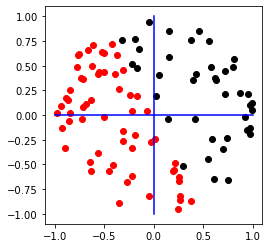

In [7]:
plot_data()

A visual representation of the data provides immediate human understanding. But machines do not have visual cortexes (yet).

Rotate points about $O$

\begin{equation*}
\begin{bmatrix}
x' \\
y'
\end{bmatrix} = \begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation*}

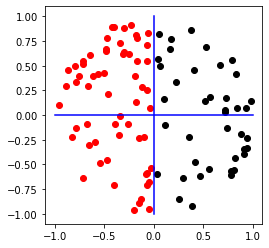

In [8]:
plot_rotated()

The machine has discovered that data merely needs to be rotated.

The data points are separated by a line

\begin{align*}
2x + y \ge 0 &\implies \text{ black} \\
2x + y < 0 &\implies \text{ red}
\end{align*}

In [9]:
def plot_line():
    
    plt.axes().set_aspect('equal')
    plt.plot(x_black, y_black, 'ko')
    plt.plot(x_red, y_red, 'ro')

    u = np.linspace(-1, 1, 100)
    v = np.zeros(100)
    w = np.linspace(-0.5, 0.5, 100)
    
    
    plt.plot(u, v, 'b')
    plt.plot(v, u, 'b')
    plt.plot(w, f(w), 'g')
    plt.show()
    

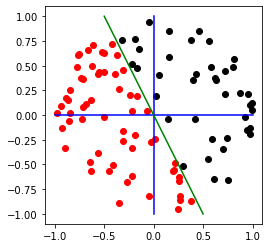

In [10]:
plot_line()

Learning is the automatic search for meaningful representations

Possible transformations include rotations, translations, linear projections and nonlinear operations such as select all points with $x > 0$

Machine learning can be understood as an automatic search for meaningful representations. Possible transformations include rotations, translations, linear projections and nonlinear operations such as select all points with x > 0.

In [11]:
def print_transformed():
    for i in range(len(x)):
        x_trans = np.cos(theta) * x[i] - np.sin(theta) * y[i]
        y_trans = np.sin(theta) * x[i] + np.cos(theta) * y[i]
        label = 'black' if x_trans > 0 else 'red'
        print(f'{x_trans: 12.10f}', ', ', f'{y_trans: 12.10f}', '\t', label,  sep='')

In [12]:
print_transformed()

-0.6092634475,  0.3905910047	red
-0.4760474080,  0.7771958364	red
-0.0641053919,  0.2490294382	red
-0.4049130040,  0.8881330933	red
-0.0637152681,  0.7062894193	red
 0.9463571511, -0.2342194492	black
-0.1901604122,  0.3937244810	red
-0.6586453309, -0.3032782690	red
-0.4167765276,  0.8865683475	red
-0.7986499936,  0.4993887973	red
 0.4193311606, -0.4784474103	black
 0.2245951822,  0.3387964010	black
-0.0993032726, -0.2262537490	red
 0.1096733612, -0.0999016492	black
-0.3915136893, -0.0934141001	red
-0.2569483112, -0.0929517305	red
-0.7150164081,  0.5488160640	red
 0.3744518009,  0.8628182134	black
 0.7804475608, -0.5611343490	black
-0.0685633717,  0.5480466687	red
 0.9846461946,  0.1459609603	black
-0.3128617847,  0.6225770229	red
-0.9554508794,  0.1009457801	red
-0.0410995697,  0.0691536785	red
-0.7118412598,  0.5214574000	red
-0.8640878027,  0.4582667359	red
-0.6780546257, -0.0895040941	red
-0.2033808512, -0.9604103996	red
 0.5190234354,  0.1418342941	black
-0.6649456289,  0.291580610

The data is more meaningful because the label can be inferred directly from the x-coordinate.

The machine searches through a set of predefined operations 

It is guided by a feedback signal that depends on the mismatch between expectation and output

The machine is restricted to a set of predefined but parameterised operations - in this case, linear transformations. The search for meaningful representations is guided by a feedback signal that depends on the mismatch between expectation and output.

This is machine learning

But what is the deep in deep learning, and where are the neural networks?

This is machine learning. But what is the deep in deep learning, and where in all this are the neural networks?